# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

### Introduction
The purpose of this project is to put in practice what I learned in data wrangling data section from Udacity Data Analysis Nanodegree program. The dataset that is wrangled is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs.

#### Gathering data
Twitter archive file: download this file manually by clicking the following link: twitter_archive_enhanced.csv

The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

Twitter API & JSON: Each tweet's retweet count and favorite ("like") count at minimum, and any additional data you find interesting. Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count.

In [278]:
#Import necessary packages

import pandas as pd
import numpy as np

#Read CSV file
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [279]:
#Download URL programmatically using requests 

import requests
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

# Save HTML to file

with open(url.split('/')[-1], mode='wb') as file:
    file.write(response.content)

# read TSV
image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')

image_predictions.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [5]:
import tweepy
import json

consumer_key = 'mIT4XfRsdFy8XMZAqMORdGSjh'
consumer_secret = 'Yo0bFPVKStw3jbw1W9lEcvEO0gXJLkqe3ogIRAw51egVzIO0Ld'
access_token = '796129701257478144-FoMoKvqo2sbGiVNH7uGTB0atLTd3VlW'
access_secret = 'vyTGiJo3q11a1vLMAYaMmxARbGG5pyOlpUrtpP7l9p9BU'




auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)


In [6]:
count = 0

# For loop which will add each available tweet to a new line of tweet-json.txt
with open('tweet_json.txt', 'w', encoding='utf8') as file:
    for tweet_id in twitter_archive['tweet_id']:
        count = count + 1
        print(count)
        print(tweet_id)
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, file)
            file.write('\n')
        except:
            continue
            
#adding a count to make sure that my code us working as there was issues with crashing 


1
892420643555336193
2
892177421306343426
3
891815181378084864
4
891689557279858688
5
891327558926688256
6
891087950875897856
7
890971913173991426
8
890729181411237888
9
890609185150312448
10
890240255349198849
11
890006608113172480
12
889880896479866881
13
889665388333682689
14
889638837579907072
15
889531135344209921
16
889278841981685760
17
888917238123831296
18
888804989199671297
19
888554962724278272
20
888202515573088257
21
888078434458587136
22
887705289381826560
23
887517139158093824
24
887473957103951883
25
887343217045368832
26
887101392804085760
27
886983233522544640
28
886736880519319552
29
886680336477933568
30
886366144734445568
31
886267009285017600
32
886258384151887873
33
886054160059072513
34
885984800019947520
35
885528943205470208
36
885518971528720385
37
885311592912609280
38
885167619883638784
39
884925521741709313
40
884876753390489601
41
884562892145688576
42
884441805382717440
43
884247878851493888
44
884162670584377345
45
883838122936631299
46
8834828469330042

In [7]:

tweets_list = []

count = 0

# Read the .txt file line by line into a list of dictionaries
for line in open('tweet_json.txt', 'r'):
    count = count +1
    print(count)
    twitter_data = json.loads(line)
    print(twitter_data['id_str'])
    tweets_list.append({'tweet_id': twitter_data['id_str'],
                         'retweet_count': twitter_data['retweet_count'],
                         'favorite_count': twitter_data['favorite_count'],
                         'followers_count': twitter_data['user']['followers_count']})
len(tweets_list)


1
892420643555336193
2
892177421306343426
3
891815181378084864
4
891689557279858688
5
891327558926688256
6
891087950875897856
7
890971913173991426
8
890729181411237888
9
890609185150312448
10
890240255349198849
11
890006608113172480
12
889880896479866881
13
889665388333682689
14
889638837579907072
15
889531135344209921
16
889278841981685760
17
888917238123831296
18
888804989199671297
19
888554962724278272
20
888078434458587136
21
887705289381826560
22
887517139158093824
23
887473957103951883
24
887343217045368832
25
887101392804085760
26
886983233522544640
27
886736880519319552
28
886680336477933568
29
886366144734445568
30
886267009285017600
31
886258384151887873
32
886054160059072513
33
885984800019947520
34
885528943205470208
35
885518971528720385
36
885311592912609280
37
885167619883638784
38
884925521741709313
39
884876753390489601
40
884562892145688576
41
884441805382717440
42
884247878851493888
43
884162670584377345
44
883838122936631299
45
883482846933004288
46
8833606908992184

2327

In [10]:
twitter_data = pd.DataFrame(tweets_list, columns = ['tweet_id', 'retweet_count', 'favorite_count', 'followers_count'])
twitter_data.info()
twitter_data.tweet_id.duplicated().value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 4 columns):
tweet_id           2327 non-null object
retweet_count      2327 non-null int64
favorite_count     2327 non-null int64
followers_count    2327 non-null int64
dtypes: int64(3), object(1)
memory usage: 72.8+ KB


False    2327
Name: tweet_id, dtype: int64

## Assessing Data
Assessing my data both visually and programmatically

In [280]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [281]:
twitter_archive.name.value_counts()

None        745
a            55
Charlie      12
Cooper       11
Oliver       11
Lucy         11
Lola         10
Penny        10
Tucker       10
Winston       9
Bo            9
the           8
Sadie         8
Daisy         7
Toby          7
an            7
Buddy         7
Bailey        7
Stanley       6
Scout         6
Koda          6
Rusty         6
Oscar         6
Bella         6
Jack          6
Jax           6
Dave          6
Milo          6
Leo           6
George        5
           ... 
Severus       1
Stefan        1
Lorelei       1
Pubert        1
Bobb          1
Beemo         1
Cheesy        1
Bodie         1
Gin           1
Roscoe        1
Taz           1
Rupert        1
Harry         1
Maks          1
Tayzie        1
Mosby         1
Georgie       1
Simba         1
Corey         1
Shawwn        1
Bloo          1
Izzy          1
Rinna         1
Gerbald       1
Jomathan      1
Deacon        1
Reagan        1
Kayla         1
Bode          1
Cal           1
Name: name, Length: 957,

In [282]:
print(twitter_archive.query("name == 'a'")['text'].sample(5))

print(twitter_archive['text'][1785])
print(twitter_archive['text'][2350])
print(twitter_archive['text'][2348])
print(twitter_archive['text'][2353])
print(twitter_archive['text'][56])

1941    This is a heavily opinionated dog. Loves walls...
2125    This is a Rich Mahogany Seltzer named Cherokee...
1878    This is a fluffy albino Bacardi Columbia mix. ...
2353    Here is a very happy pup. Big fan of well-main...
2211    Here is a horned dog. Much grace. Can jump ove...
Name: text, dtype: object
This is a dog swinging. I really enjoyed it so I hope you all do as well. 11/10 https://t.co/Ozo9KHTRND
This is a truly beautiful English Wilson Staff retriever. Has a nice phone. Privileged. 10/10 would trade lives with https://t.co/fvIbQfHjIe
Here is a Siberian heavily armored polar bear mix. Strong owner. 10/10 I would do unspeakable things to pet this dog https://t.co/rdivxLiqEt
Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR
Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af 
(IG: puffie_the_chow) https://t.co/ghXBIIeQZF


In [283]:
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [284]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [285]:
print(twitter_archive.query("rating_denominator % 10 != 0")['text'])

print(twitter_archive['text'][342])
print(twitter_archive['text'][516])
print(twitter_archive['text'][784])
print(twitter_archive['text'][1068])
print(twitter_archive['text'][1662])
print(twitter_archive['text'][1663])
print(twitter_archive['text'][2335])



342              @docmisterio account started on 11/15/15
516     Meet Sam. She smiles 24/7 &amp; secretly aspir...
784     RT @dog_rates: After so many requests, this is...
1068    After so many requests, this is Bretagne. She ...
1662    This is Darrel. He just robbed a 7/11 and is i...
1663    I'm aware that I could've said 20/16, but here...
2335    This is an Albanian 3 1/2 legged  Episcopalian...
Name: text, dtype: object
@docmisterio account started on 11/15/15
Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…
After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Wa

In [286]:
twitter_archive.query("rating_denominator =='15'")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
342,832088576586297345,8.320875e+17,30582082.0,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None


In [287]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [288]:
twitter_archive['tweet_id'].duplicated().value_counts()

False    2356
Name: tweet_id, dtype: int64

In [289]:
image_predictions.duplicated().value_counts()

False    2075
dtype: int64

In [290]:
twitter_archive.query("rating_denominator == '0'")['text']
print(twitter_archive['text'][313])


#Finding the text of dog whose rating was infinite to see if there was an error.

@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho


### Quality issues
1. Clear all the retweeted entries.

2. Remove columns not necesarry for our analysis 

3. Correct incorrect data types for tweet_id, and timestamp

4. Correct time/date format


5. Correct the numerator ratings so they include decimal values

6. Name Errors - no dog called "A" or "An"ring 

7. Correct all the dog rating where the denominator isn't a multiple of 10.

8. Correct the ratings to all be out of 10 (decimals)

### Tidiness issues
1. Merge dog adjective columns

2. Merge all tables together

## Cleaning Data

Here I will clean the 8 tidiness issues, and the 2 quality issues stated above.


In [387]:
# Make copies of original pieces of data
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
twitter_data_clean = twitter_data.copy()

### Issue #1:

#### Define:
Removing all the retweets so that we only contain original dog rating tweets.


#### Code

In [388]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['retweeted_status_id'].isnull()]
#Removing all the non null values in the retweeted status I'd column

#### Test

In [389]:
twitter_archive_clean.retweeted_status_id.value_counts().sum()

0

In [390]:

twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

### Issue #2:

#### Define
Removing the columns not necessary for our analysis.
'in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','expanded_urls'

#### Code

In [391]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

In [392]:
twitter_archive_clean = twitter_archive_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','expanded_urls'], axis = 1)
#Using .drop to remove all our unneeded columns within our dataframe

#### Test

In [393]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
source                2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: int64(3), object(8)
memory usage: 203.9+ KB


### Issue 3 and 4

#### Define:
incorrect data types.

#### Code:

In [394]:
twitter_archive_clean['tweet_id'] = twitter_archive_clean['tweet_id'].astype('str')
twitter_archive_clean['timestamp'] = twitter_archive_clean['timestamp'].astype('datetime64[ns]')
twitter_archive_clean['rating_numerator'] = twitter_archive_clean['rating_numerator'].astype(float)

image_predictions_clean['tweet_id'] = image_predictions_clean['tweet_id'].astype('str')
twitter_data_clean['tweet_id'] = twitter_data_clean['tweet_id'].astype('str')
#Using .astype to conver tweet_id and timestamp to a string and datatime, respectively

#### Test

In [395]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null float64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(8)
memory usage: 203.9+ KB


In [396]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [397]:
twitter_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 4 columns):
tweet_id           2327 non-null object
retweet_count      2327 non-null int64
favorite_count     2327 non-null int64
followers_count    2327 non-null int64
dtypes: int64(3), object(1)
memory usage: 72.8+ KB


### issue 5:

#### Define:
making sure the numerator pulls through decimal values



In [398]:
ratings = twitter_archive_clean.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
twitter_archive_clean.rating_numerator = ratings[0]


#### Test:


In [399]:
twitter_archive_clean.rating_numerator.value_counts()

12       500
10       442
11       426
13       307
9        156
8         98
7         53
14        43
5         34
6         32
3         19
4         17
2          9
1          8
0          2
420        2
204        1
144        1
666        1
1776       1
143        1
15         1
20         1
99         1
9.5        1
11.26      1
44         1
84         1
50         1
80         1
24         1
9.75       1
45         1
121        1
13.5       1
88         1
17         1
165        1
182        1
60         1
960        1
11.27      1
007        1
Name: rating_numerator, dtype: int64

### Issue 6

#### Define:
Correcting the naming issues where the name is classed as "a" or "an" etc.
All dogs without a capital first letter seem to be naming errors.

#### Code:

In [400]:


def convert_names(x):
    if x[0] == x[0].lower():
        return "None"
    return x
 

twitter_archive_clean.name = twitter_archive_clean['name'].apply(convert_names)

In [401]:
twitter_archive_clean.name.value_counts()

None         784
Charlie       11
Lucy          11
Cooper        10
Oliver        10
Tucker         9
Penny          9
Winston        8
Sadie          8
Lola           8
Toby           7
Daisy          7
Jax            6
Koda           6
Bella          6
Bailey         6
Stanley        6
Oscar          6
Bo             6
Bentley        5
Leo            5
Buddy          5
Milo           5
Scout          5
Dave           5
Louis          5
Chester        5
Rusty          5
Gus            4
Cassie         4
            ... 
Barry          1
Baloo          1
Shnuggles      1
Eriq           1
Kloey          1
Georgie        1
Mosby          1
Tayzie         1
Gidget         1
Meyer          1
Tove           1
Sprinkles      1
Tanner         1
Stella         1
Kaiya          1
Rhino          1
Margo          1
Franq          1
Staniel        1
Maks           1
Thor           1
Jaycob         1
Hazel          1
Holly          1
Bodie          1
Chompsky       1
Taz            1
Rupert        

### Issue 7

#### Define:
Correct all the dog rating where the denominator isn't a multiple of 10. When looking at the text for the dogs we could see that for some there is other numbers in the tweet, which are getting pulled through instead of the actual rating.
Remove the others that are just incorrect, with no rating.
#### Code:

In [402]:
print(twitter_archive_clean.query("rating_denominator % 10 != 0")['text'])

print(twitter_archive_clean['text'][313])
print(twitter_archive_clean['text'][342])
print(twitter_archive_clean['text'][516])
print(twitter_archive_clean['text'][1068])
print(twitter_archive_clean['text'][1662])
print(twitter_archive_clean['text'][1663])
print(twitter_archive_clean['text'][2335])



342              @docmisterio account started on 11/15/15
516     Meet Sam. She smiles 24/7 &amp; secretly aspir...
1068    After so many requests, this is Bretagne. She ...
1662    This is Darrel. He just robbed a 7/11 and is i...
1663    I'm aware that I could've said 20/16, but here...
2335    This is an Albanian 3 1/2 legged  Episcopalian...
Name: text, dtype: object
@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
@docmisterio account started on 11/15/15
Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5
I'm aware that I could've said 20/16,

In [403]:
740373189193256964

740373189193256964

In [404]:
twitter_archive_clean.loc[1068, 'rating_numerator'] = 14
twitter_archive_clean.loc[1068, 'rating_denominator'] = 10
twitter_archive_clean.loc[1662, 'rating_numerator'] = 10
twitter_archive_clean.loc[1662, 'rating_denominator'] = 10
twitter_archive_clean.loc[2335, 'rating_numerator'] = 9
twitter_archive_clean.loc[2335, 'rating_denominator'] = 10
twitter_archive_clean.loc[313, 'rating_numerator'] = 13
twitter_archive_clean.loc[313, 'rating_denominator'] = 10

In [405]:
twitter_archive_clean = twitter_archive_clean.drop(labels=[342,516,1663], axis=0)

#### Test:

In [406]:
twitter_archive_clean.rating_denominator.value_counts()



10     2157
50        3
80        2
20        2
170       1
150       1
130       1
120       1
110       1
90        1
70        1
40        1
Name: rating_denominator, dtype: int64

### Issue 8:

#### Define:
Add a column to contain a single decimal score

#### Code:


In [407]:
twitter_archive_clean['rating_numerator'] = twitter_archive_clean['rating_numerator'].astype(float)



In [408]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2172 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2172 non-null object
timestamp             2172 non-null datetime64[ns]
source                2172 non-null object
text                  2172 non-null object
rating_numerator      2172 non-null float64
rating_denominator    2172 non-null int64
name                  2172 non-null object
doggo                 2172 non-null object
floofer               2172 non-null object
pupper                2172 non-null object
puppo                 2172 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(8)
memory usage: 203.6+ KB


In [409]:

twitter_archive_clean['score'] = twitter_archive_clean["rating_numerator"] / twitter_archive_clean["rating_denominator"]

#creating a new column called score which converts to numerator and denominator scores into a combined decimal value.



#### Test:

In [410]:
twitter_archive_clean.score.value_counts()

1.200      504
1.000      445
1.100      431
1.300      308
0.900      157
0.800       98
0.700       53
1.400       44
0.500       34
0.600       32
0.300       19
0.400       15
0.200       11
0.100        7
0.000        2
42.000       2
1.126        1
1.127        1
18.200       1
1.350        1
0.975        1
66.600       1
1.700        1
0.950        1
1.500        1
177.600      1
Name: score, dtype: int64

### Tidiness

### Issue 1:

#### Define: 
joining the columns doggos, floofers, puppers and puppos into one column using the function melt.

#### Code:

In [411]:
twitter_archive_clean = pd.melt(twitter_archive_clean, id_vars=['tweet_id','timestamp','source','text','rating_numerator','rating_denominator','name','score'], var_name = 'dogs', value_name='dog_noun')
twitter_archive_clean = twitter_archive_clean.drop('dogs', axis = 1)
twitter_archive_clean = twitter_archive_clean.sort_values('dog_noun').drop_duplicates(subset='tweet_id', 
                                                                                        keep='last')
                            

#### Test:


In [412]:
twitter_archive_clean.dog_noun.value_counts()

None       1828
pupper      234
doggo        75
puppo        25
floofer      10
Name: dog_noun, dtype: int64

### Issue 2

#### Define:
Merge all data frames into one
#### Code:

In [413]:
all_data_clean = pd.merge(left=twitter_archive_clean, right=twitter_data_clean, how='left', on='tweet_id') 
all_data_clean = pd.merge(left=all_data_clean, right=image_predictions_clean, how='left', on='tweet_id')

In [414]:
all_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2172 entries, 0 to 2171
Data columns (total 23 columns):
tweet_id              2172 non-null object
timestamp             2172 non-null datetime64[ns]
source                2172 non-null object
text                  2172 non-null object
rating_numerator      2172 non-null float64
rating_denominator    2172 non-null int64
name                  2172 non-null object
score                 2172 non-null float64
dog_noun              2172 non-null object
retweet_count         2164 non-null float64
favorite_count        2164 non-null float64
followers_count       2164 non-null float64
jpg_url               1993 non-null object
img_num               1993 non-null float64
p1                    1993 non-null object
p1_conf               1993 non-null float64
p1_dog                1993 non-null object
p2                    1993 non-null object
p2_conf               1993 non-null float64
p2_dog                1993 non-null object
p3                

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [415]:
all_data_clean.to_csv('twitter_archive_master.csv', index=False)

In [416]:
all_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2172 entries, 0 to 2171
Data columns (total 23 columns):
tweet_id              2172 non-null object
timestamp             2172 non-null datetime64[ns]
source                2172 non-null object
text                  2172 non-null object
rating_numerator      2172 non-null float64
rating_denominator    2172 non-null int64
name                  2172 non-null object
score                 2172 non-null float64
dog_noun              2172 non-null object
retweet_count         2164 non-null float64
favorite_count        2164 non-null float64
followers_count       2164 non-null float64
jpg_url               1993 non-null object
img_num               1993 non-null float64
p1                    1993 non-null object
p1_conf               1993 non-null float64
p1_dog                1993 non-null object
p2                    1993 non-null object
p2_conf               1993 non-null float64
p2_dog                1993 non-null object
p3                

## Analyzing and Visualizing Data


### Most used dog noun:

In [417]:
all_data_clean.dog_noun.value_counts()

None       1828
pupper      234
doggo        75
puppo        25
floofer      10
Name: dog_noun, dtype: int64

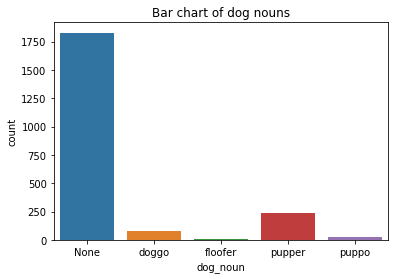

In [432]:
import seaborn as sb
import matplotlib.pyplot as plt

sb.countplot(data = all_data_clean, x = 'dog_noun')
plt.title('Bar chart of dog nouns');



Here we can clearly see that the majority of tweets don't contain either doggo, floofer, pupper or puppo. Out of the four, pupper is used in the most tweets.

### Average dog rating:

In [419]:
all_data_clean.score.value_counts()

1.200      504
1.000      445
1.100      431
1.300      308
0.900      157
0.800       98
0.700       53
1.400       44
0.500       34
0.600       32
0.300       19
0.400       15
0.200       11
0.100        7
42.000       2
0.000        2
18.200       1
1.500        1
0.950        1
1.126        1
1.127        1
66.600       1
0.975        1
1.350        1
1.700        1
177.600      1
Name: score, dtype: int64

In [420]:
dogscores = all_data_clean.query("score <= 2")


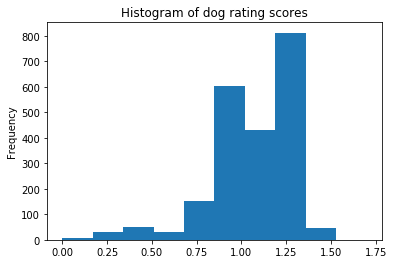

In [431]:
plt.hist(dogscores['score'])
plt.title('Histogram of dog rating scores')
plt.ylabel('Frequency');

Here we can see that the majority of scores are above 1, showing that the scorers tend to put scores where the numerator is greater than the denominator. The most popular score was 1.2.

### Retweet vs Favourite scatterplot

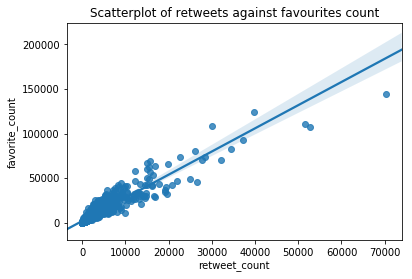

In [422]:
sb.regplot(data = all_data_clean, x = 'retweet_count', y = 'favorite_count')
plt.title('Scatterplot of retweets against favourites count');

In [423]:
all_data_clean['retweet_count'].corr(all_data_clean['favorite_count'])

0.92624175429517641

Here was can see that there is a clear correlation between retween count and favourite count.

### Top 10 dog breed predictions

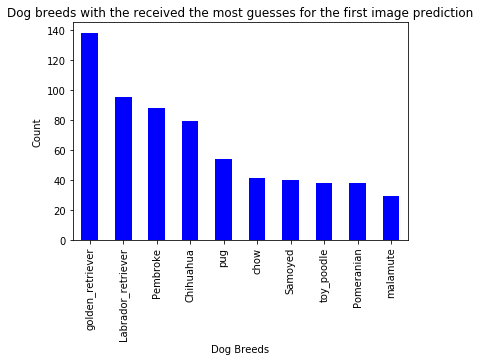

In [424]:
p1_top10 = all_data_clean.p1.value_counts()[0:10]
p1_top10.plot.bar(color = 'blue')
plt.title('Dog breeds with the received the most guesses for the first image prediction')
plt.xlabel('Dog Breeds')
plt.ylabel('Count');

Golden retriever was the dog breed that received the most guesses when for the first image prediction.